In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import ipywidgets as widgets
from plotly.widgets import GraphWidget
from IPython.display import display, clear_output, Image
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot



<IPython.core.display.Javascript object>

In [2]:
category_dict = {
    1 : "Collectibles",
    99: "Everything Else",
    220:"Toys & Hobbies",
    237:"Dolls & Bears",
    260:"Stamps",
    267:"Books",
    281:"Jewelry & Watches",
    293:"Consumer Electronics",
    316:"Specialty Services",
    382:"Sporting Goods",
    550:"Art",
    619:"Musical Instruments & Gear",
    625:"Cameras & Photo",
    870:"Pottery & Glass",
    888:"Sporting Goods",
    1249:"Video Games & Consoles",
    1281:"Pet Supplies",
    1305:"Tickets & Experiences",
    2984:"Baby",
    3252:"Travel",
    6028:"Parts & Accessories",
    11116:"Coins & Paper Money",
    11232:"DVDs & Movies",
    11233:"Music",
    11450:"Fashion",
    11700:"Home & Garden",
    12576:"Business & Industrial",
    14339:"Crafts",
    15032:"Cell Phones & Accessories",
    20081:"Antiques",
    26395:"Health & Beauty",
    45100:"Enternatinment Memorabilia",
    58058:"Computers, Tablets & Networking",
    64482:"Sports Mem, Cards & Fan Shop",
    999000:"Digital Goods"
}

In [3]:
jul_total = pd.read_csv("../csv/Apr 19/jul_total_offers.csv")
jul_feedback = pd.read_csv("../csv/Apr 19/jul_total_feedbacks.csv")
aug_total = pd.read_csv("../csv/Apr 19/aug_total_offers.csv")
aug_feedback = pd.read_csv("../csv/Apr 19/aug_total_feedbacks.csv")
sep_total = pd.read_csv("../csv/Apr 19/sep_total_offers.csv")
sep_feedback = pd.read_csv("../csv/Apr 19/sep_total_feedbacks.csv")
oct_total = pd.read_csv("../csv/Apr 19/oct_total_offers.csv")
oct_feedback = pd.read_csv("../csv/Apr 19/oct_total_feedbacks.csv")
nov_total = pd.read_csv("../csv/Apr 19/nov_total_offers.csv")
nov_feedback = pd.read_csv("../csv/Apr 19/nov_total_feedbacks.csv")
dec_total = pd.read_csv("../csv/Apr 19/dec_total_offers.csv")
dec_feedback = pd.read_csv("../csv/Apr 19/dec_total_feedbacks.csv")
jan_total = pd.read_csv("../csv/Apr 19/jan_total_offers.csv")
jan_feedback = pd.read_csv("../csv/Apr 19/jan_total_feedbacks.csv")
feb_total = pd.read_csv("../csv/Apr 19/feb_total_offers.csv")
feb_feedback = pd.read_csv("../csv/Apr 19/feb_total_feedbacks.csv")
mar_total = pd.read_csv("../csv/Apr 19/mar_total_offers.csv")
mar_feedback = pd.read_csv("../csv/Apr 19/mar_total_feedbacks.csv")

In [4]:
jul = jul_total.merge(jul_feedback, how='left', left_on='id', right_on='offer_id')
jul['sold_on'] = pd.to_datetime(jul.sold_on, format='%Y-%m-%d') 
aug = aug_total.merge(aug_feedback, how='left', left_on='id', right_on='offer_id')
aug['sold_on'] = pd.to_datetime(aug.sold_on, format='%Y-%m-%d')
sep = sep_total.merge(sep_feedback, how='left', left_on='id', right_on='offer_id')
sep['sold_on'] = pd.to_datetime(sep.sold_on, format='%Y-%m-%d')
octo = oct_total.merge(oct_feedback, how='left', left_on='id', right_on='offer_id')
octo['sold_on'] = pd.to_datetime(octo.sold_on, format='%Y-%m-%d') 
nov = nov_total.merge(nov_feedback, how='left', left_on='id', right_on='offer_id')
nov['sold_on'] = pd.to_datetime(nov.sold_on, format='%Y-%m-%d')
dec = dec_total.merge(dec_feedback, how='left', left_on='id', right_on='offer_id')
dec['sold_on'] = pd.to_datetime(dec.sold_on, format='%Y-%m-%d')
jan = jan_total.merge(jan_feedback, how='left', left_on='id', right_on='offer_id')
jan['sold_on'] = pd.to_datetime(jan.sold_on, format='%Y-%m-%d') 
feb = feb_total.merge(feb_feedback, how='left', left_on='id', right_on='offer_id')
feb['sold_on'] = pd.to_datetime(feb.sold_on, format='%Y-%m-%d')
mar = mar_total.merge(mar_feedback, how='left', left_on='id', right_on='offer_id')
mar['sold_on'] = pd.to_datetime(mar.sold_on, format='%Y-%m-%d')
for key, value in category_dict.items():
    jul.highest_parent_id.replace(key, value, inplace=True)
    aug.highest_parent_id.replace(key, value, inplace=True)
    sep.highest_parent_id.replace(key, value, inplace=True)
    octo.highest_parent_id.replace(key, value, inplace=True)
    nov.highest_parent_id.replace(key, value, inplace=True)
    dec.highest_parent_id.replace(key, value, inplace=True)
    jan.highest_parent_id.replace(key, value, inplace=True)
    feb.highest_parent_id.replace(key, value, inplace=True)
    mar.highest_parent_id.replace(key, value, inplace=True)

q3 = pd.concat([jul,aug,sep], sort=False)
q4 = pd.concat([octo,nov,dec], sort=False)    
q1 = pd.concat([jan,feb,mar], sort=False)
all_data = pd.concat([q3, q4, q1], sort=False)

In [5]:
all_data['month'] = all_data['sold_on'].dt.month
months = {
    1 : 'January',
    2 : 'February',
    3 : 'March',
    4 : 'April',
    5 : 'May',
    6 : 'June',
    7 : 'July',
    8 : 'August',
    9 : 'September',
    10 : 'October',
    11 : 'November',
    12 : 'December'
    
}
for i, v in months.items():
    all_data.month.replace(i, v, inplace=True)

In [115]:
all_data_neg = all_data[all_data.rating_em < 3].reset_index()
all_data_pos = all_data[all_data.rating_em > 3].reset_index()
all_feedback = all_data[all_data.rating_em.notnull()].reset_index()


Next I want to group all the negative data by week and look at the percentage of negative

Do I need to create seperate data frames? Or can I use a drop down to change the category dynamically? I don't believe I can do this without using dash.

What are the top categories that I want to look at?
1. Fashion
2. Home & Garden
3. Health & Beauty
4. Computers, Tablets & Networking
5. Toys & Hobbies
6. Jewelry & Watches
7. Collectibles
8. Parts & Accessories
9. Sports Mem, Cards & Fan Shop
10. Consumer Electronics
11. DVDs & Movies
12. Cell Phones & Accessories
13. Business and Industrial
14. Video Games & Consoles


For each of these I want a line graph that shows the number of positive reviews per week and the number of negative reviews per week each should label the average and max

In [220]:
def category_graph(category):
    cat_data_tot_month = all_data[all_data['highest_parent_id'] == category].groupby('month').count().reset_index()
    cat_data_tot_month['month'] = pd.Categorical(cat_data_tot_month['month'], ['July', 'August', 'September', 'October','November','December','January','February','March'])
    cat_data_tot_month.sort_values('month', inplace=True)
    cat_data_tot_month.dropna(inplace=True)
    cat_data_tot_month.set_index('month', inplace=True)
    
    cat_data_all_month = all_feedback[all_feedback['highest_parent_id'] == category].groupby('month').count().reset_index()
    cat_data_all_month['month'] = pd.Categorical(cat_data_all_month['month'], ['July', 'August', 'September', 'October','November','December','January','February','March'])
    cat_data_all_month.sort_values('month', inplace=True)
    cat_data_all_month.dropna(inplace=True)
    cat_data_all_month.set_index('month', inplace=True)
    
    
    cat_data_pos_month = all_data_pos[all_data_pos['highest_parent_id'] == category].groupby('month').count().reset_index()
    cat_data_pos_month['month'] = pd.Categorical(cat_data_pos_month['month'], ['July', 'August', 'September', 'October','November','December','January','February','March'])
    cat_data_pos_month.sort_values('month', inplace=True)
    cat_data_pos_month.dropna(inplace=True)
    cat_data_pos_month.set_index('month', inplace=True)

    cat_data_neg_month = all_data_neg[all_data_neg['highest_parent_id'] == category].groupby('month').count().reset_index()
    cat_data_neg_month['month'] = pd.Categorical(cat_data_neg_month['month'], ['July', 'August', 'September', 'October','November','December','January','February','March'])
    cat_data_neg_month.sort_values('month', inplace=True)
    cat_data_neg_month.dropna(inplace=True)
    cat_data_neg_month.set_index('month', inplace=True)
    print('Positive Feedback Correlation: ' + str(cat_data_pos_month['id'].corr(cat_data_tot_month.id)))
    print('Negative Feedback Correlation: ' + str(cat_data_neg_month['id'].corr(cat_data_tot_month.id)))

    trace_neg = go.Scatter(x=cat_data_neg_month.index,
                y=cat_data_neg_month.id,
               name='Negative Feedback',
               line=dict(color='#F06A6A'))

    trace_tran = go.Scatter(x=cat_data_tot_month.index,
                        y=cat_data_tot_month.id,
                        name='Number of transactions',
                        line=dict(color='#9E9E9E', dash='dash'),
                        yaxis='y3')
    
    trace_per = go.Scatter(x=cat_data_tot_month.index,
                               y=cat_data_all_month.id/cat_data_tot_month.id,
                               name='Feedback Percent',
                               yaxis='y2',
                               line=dict(color='rgb(148, 103, 189)'))

    trace_pos = go.Scatter(x=cat_data_pos_month.index,
                        y=cat_data_pos_month.id,
                       name='Positive Feedback',
                       line=dict(color='#33CFA5'))

    trace_pos_avg = go.Scatter(x=cat_data_neg_month.index,
                        y=[cat_data_pos_month.id.mean()]*len(cat_data_pos_month.index),
                       name='Positive Feedback Average',
                       line=dict(color='#33CFA5', dash='dash'))

    
    data = [trace_neg, trace_per, trace_tran, trace_pos]

    layout = dict(title=category,
                  autosize=False,
                  width=1000,
                  height=500,
                  xaxis=dict(
                    domain=[0.1, .9]
                    ),
                  yaxis=dict(
                    title='Count Feedback'
                    ),
                  yaxis2=dict(
                    title='Percent Feedback',
                    titlefont=dict(
                        color='rgb(148, 103, 189)'
                    ),
                    tickfont=dict(
                        color='rgb(148, 103, 189)'
                    ),
                    overlaying='y',
                    side='right'
                    ),
                  yaxis3=dict(
                    title='Number of Transactions',
                    titlefont=dict(
                        color='rgb(158, 148, 158)'
                    ),
                    tickfont=dict(
                        color='rgb(158, 148, 158)'
                    ),
                    anchor='free',
                    overlaying='y',
                    side='left',
                    position=0.0
                ))
    fig = dict(data=data, layout=layout)
    return iplot(fig, filename = category)

top_categories = ['Fashion',
'Home & Garden',
'Health & Beauty',
'Computers, Tablets & Networking',
'Toys & Hobbies',
'Jewelry & Watches',
'Collectibles',
'Parts & Accessories',
'Sports Mem, Cards & Fan Shop',
'Consumer Electronics',
'DVDs & Movies',
'Cell Phones & Accessories',
'Business & Industrial',
'Video Games & Consoles']



Positive Feedback Correlation: 0.7172392709068014
Negative Feedback Correlation: 0.849009707209343


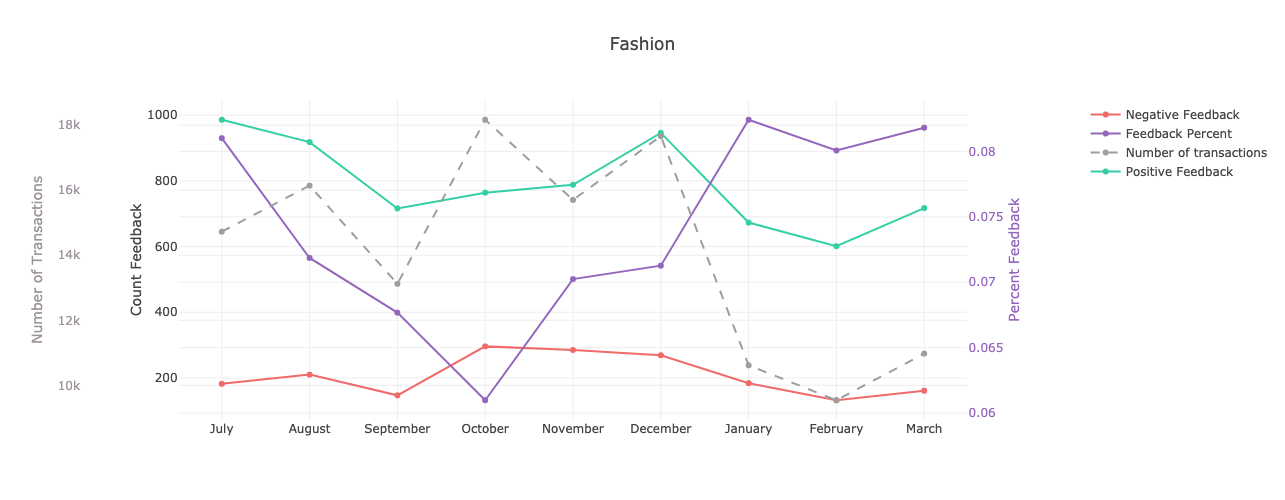

In [222]:
category_graph('Fashion')

Positive Feedback Correlation: 0.9653749725387701
Negative Feedback Correlation: 0.7058995292479209


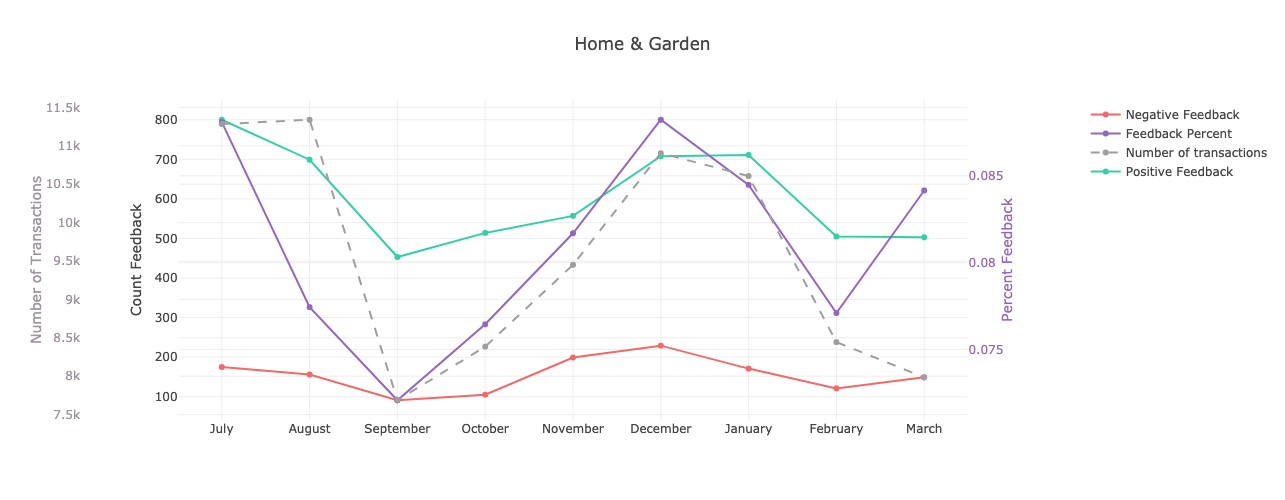

In [223]:
category_graph('Home & Garden')

Positive Feedback Correlation: 0.8318552172399227
Negative Feedback Correlation: 0.6824004162349663


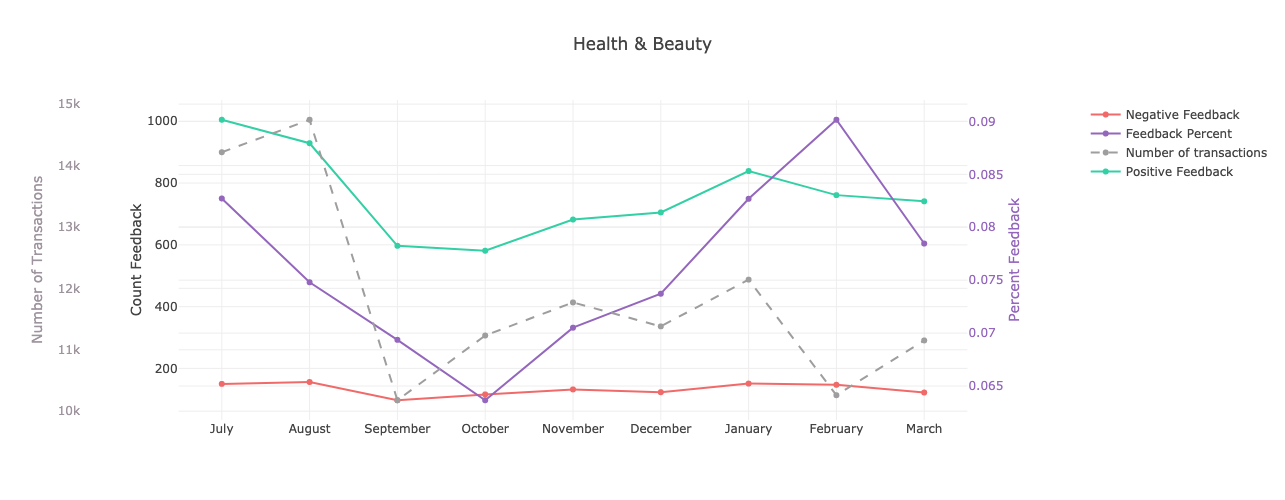

In [224]:
category_graph('Health & Beauty')

Posotive Feedback Correlation: 0.9005031977315079
Negative Feedback Correlation: 0.5448455870089133


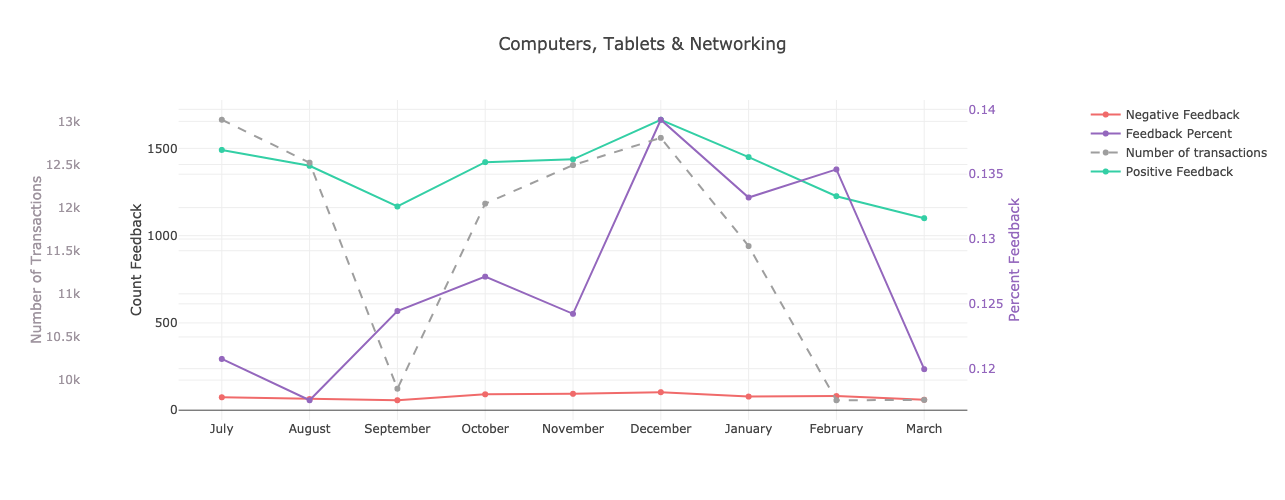

In [205]:
category_graph('Computers, Tablets & Networking')

Posotive Feedback Correlation: 0.912343740543164
Negative Feedback Correlation: 0.8475110666344949


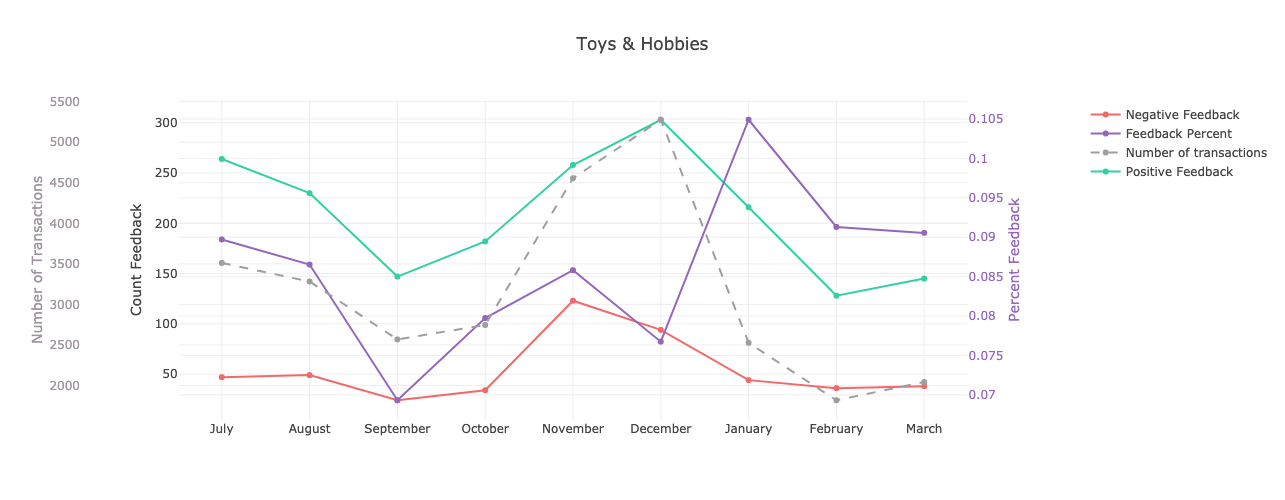

In [206]:
category_graph('Toys & Hobbies')

Posotive Feedback Correlation: 0.5856760078696411
Negative Feedback Correlation: 0.8181003743707213


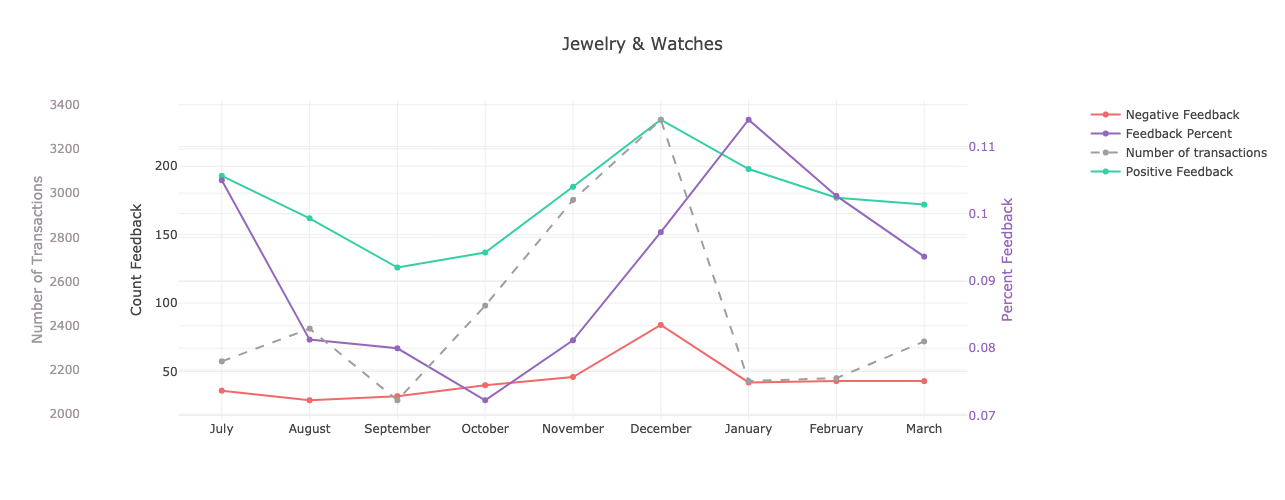

In [207]:
category_graph('Jewelry & Watches')

Posotive Feedback Correlation: 0.8700399242767276
Negative Feedback Correlation: 0.7559271531878741


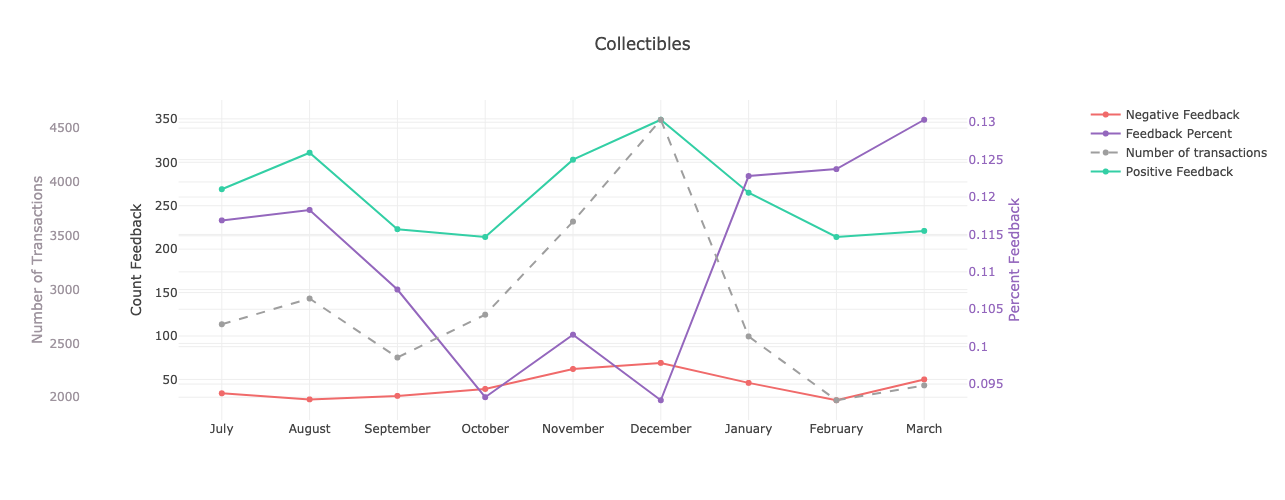

In [208]:
category_graph('Collectibles')

Posotive Feedback Correlation: 0.9016402736006817
Negative Feedback Correlation: 0.5198360359415701


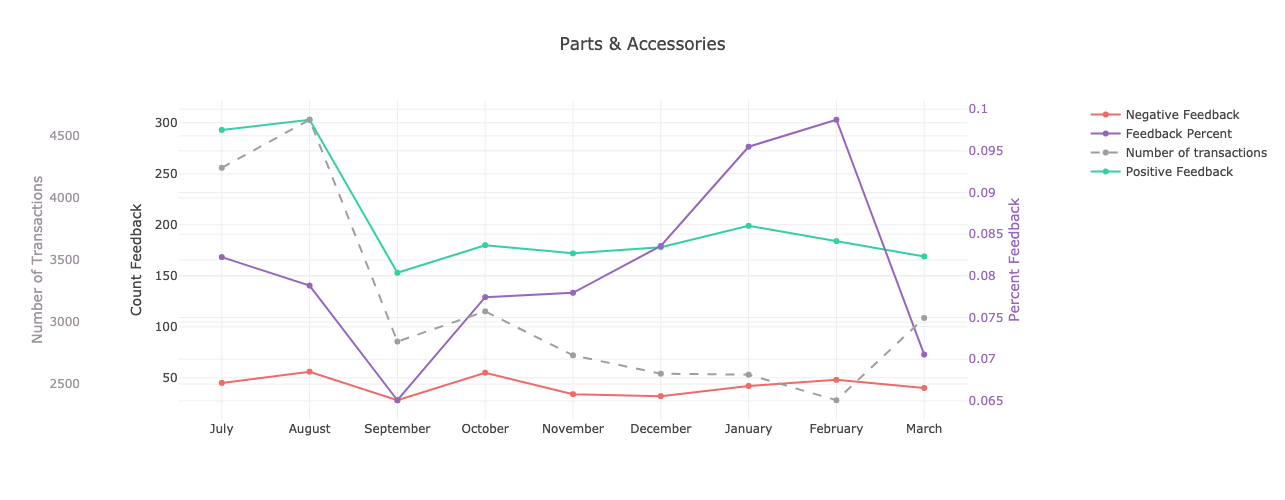

In [209]:
category_graph('Parts & Accessories')

Posotive Feedback Correlation: 0.9209370041764122
Negative Feedback Correlation: 0.9014891808684471


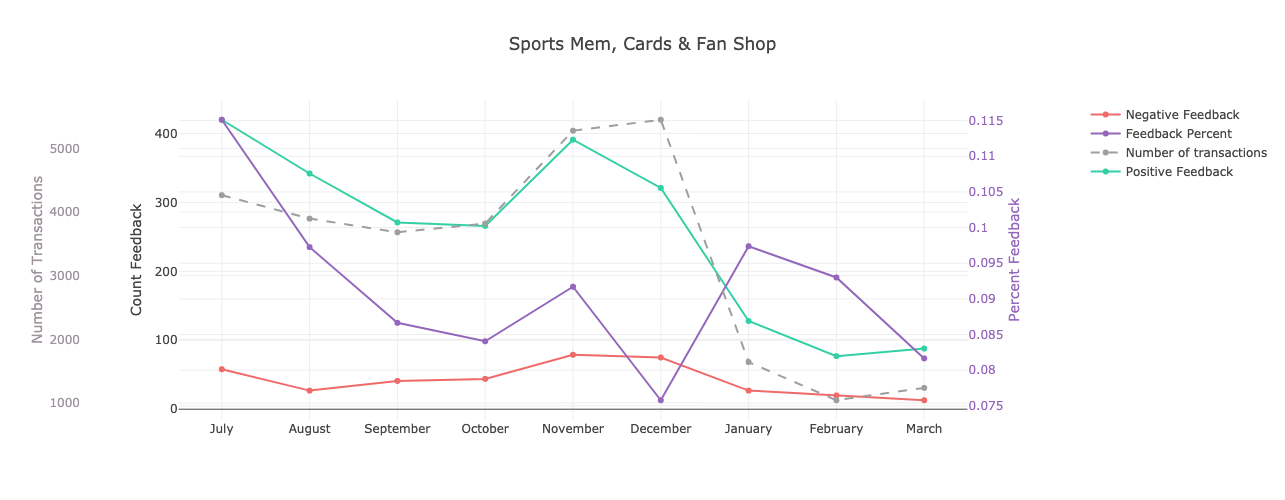

In [210]:
category_graph('Sports Mem, Cards & Fan Shop')

Posotive Feedback Correlation: 0.758048689910733
Negative Feedback Correlation: 0.6499702762061639


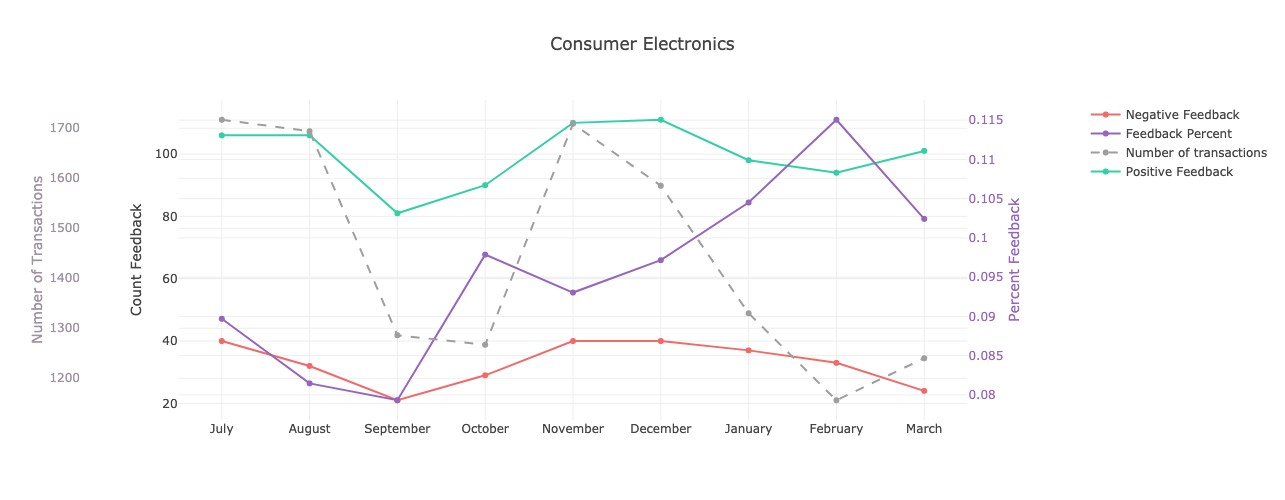

In [211]:
category_graph('Consumer Electronics')

Posotive Feedback Correlation: 0.7478851138547739
Negative Feedback Correlation: 0.6524318839109485


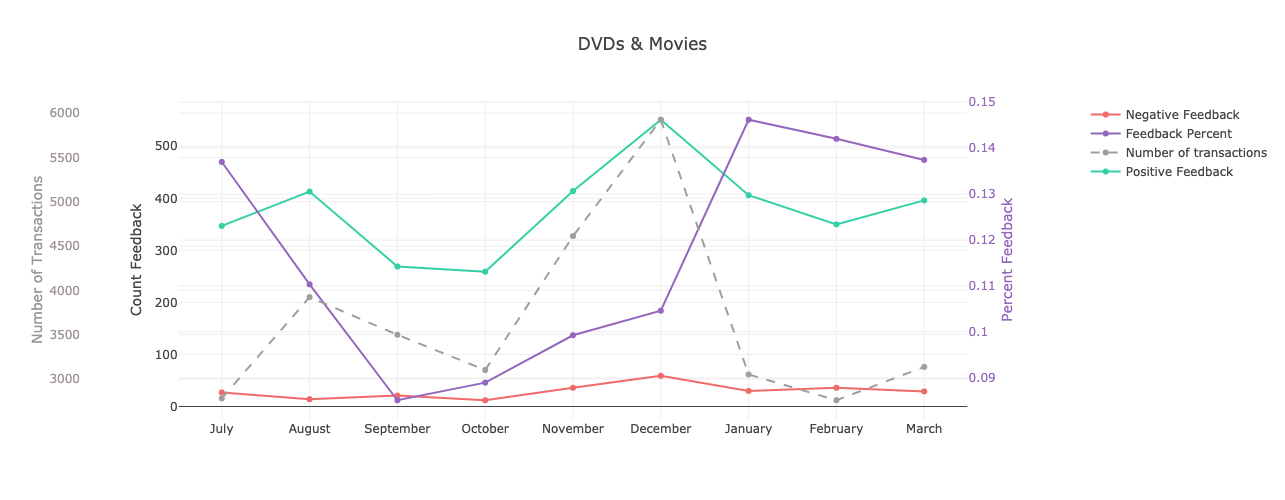

In [212]:
category_graph('DVDs & Movies')

Posotive Feedback Correlation: 0.8576945702481702
Negative Feedback Correlation: 0.31091027543459665


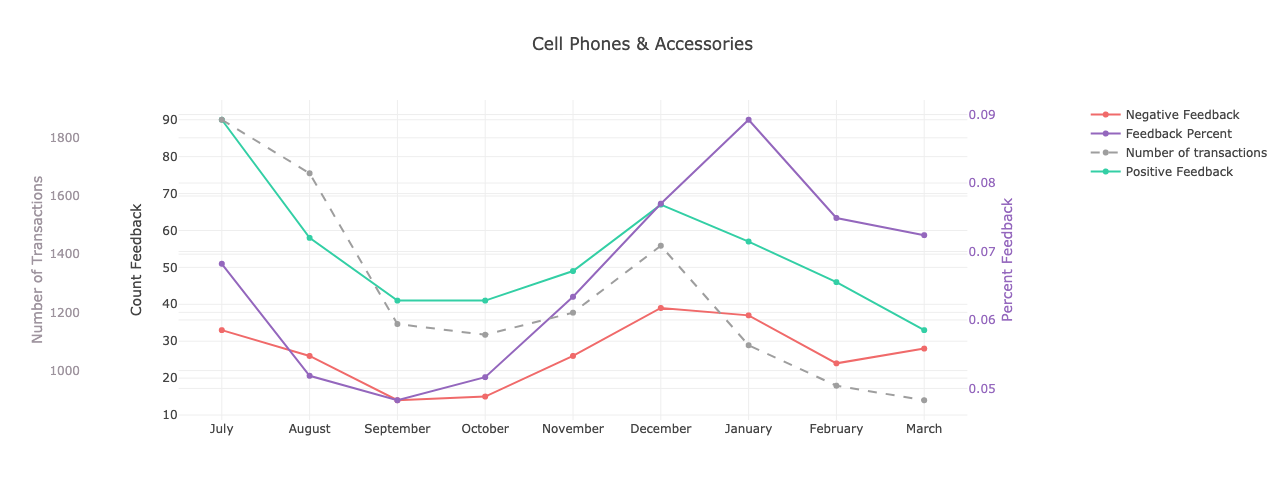

In [213]:
category_graph('Cell Phones & Accessories')

Posotive Feedback Correlation: 0.7538766444529993
Negative Feedback Correlation: -0.3358911017450408


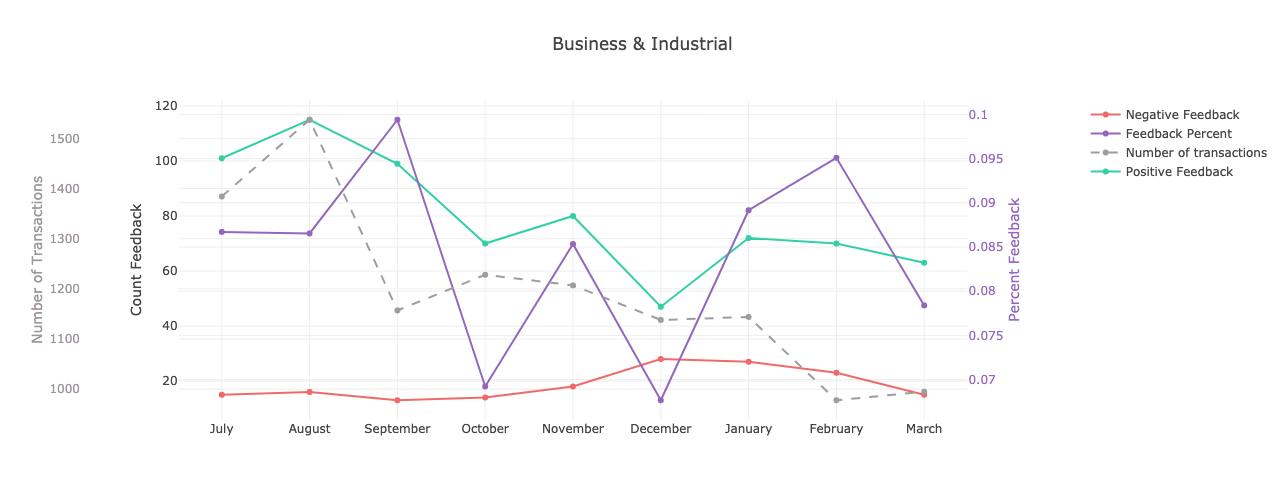

In [214]:
category_graph('Business & Industrial')

Posotive Feedback Correlation: 0.6184592202766609
Negative Feedback Correlation: 0.804032800003029


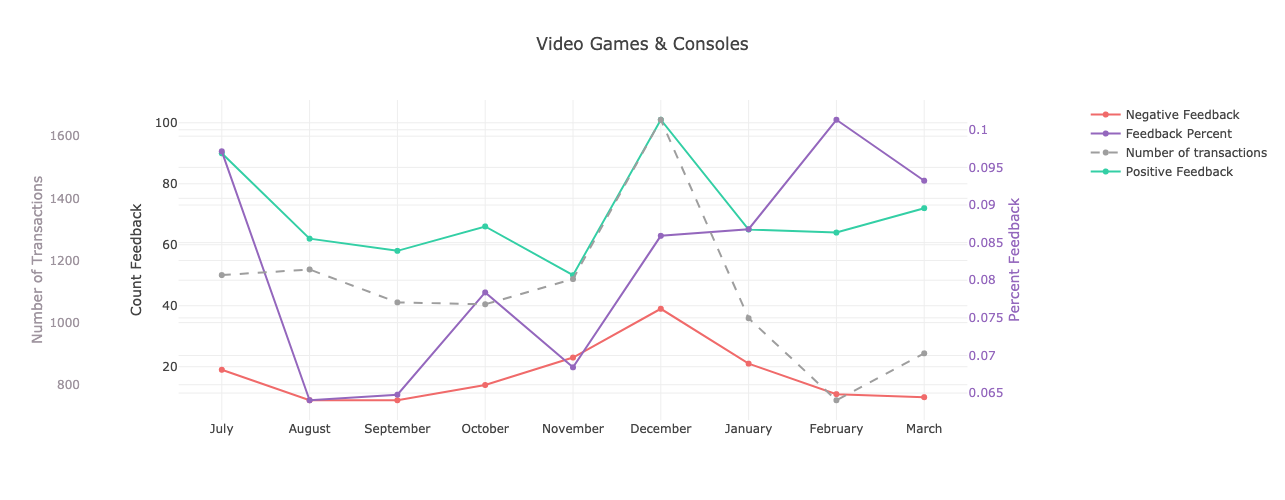

In [215]:
category_graph('Video Games & Consoles')

In [60]:
category = widgets.Dropdown(options=list(all_data_neg["highest_parent_id"].unique()), value='Fashion', description='Category', disabled=False)
url = py.plot({'data': [go.Scatter(x=[], y=[]), go.Scatter(x=[], y=[])]},
               filename = 'widget template', auto_open=False)

g = GraphWidget(url)
display(g)                         


GraphWidget()

In [40]:
all_data_neg = all_data[all_data.rating_em < 3].reset_index()
all_data_pos = all_data[all_data.rating_em < 3].reset_index()
all_data_total = all_data.id.count()


print(all_data_neg[all_data_neg.highest_parent_id == 'Fashion'].groupby(all_data_neg['sold_on'].dt.month).count())

         index   id  sold_on  highest_parent_id  offer_id  rating_em  \
sold_on                                                                
1          184  184      184                184       184        184   
2          132  132      132                132       132        132   
3          161  161      161                161       161        161   
7          182  182      182                182       182        182   
8          210  210      210                210       210        210   
9            4    4        4                  4         4          4   
10         295  295      295                295       295        295   
11         285  285      285                285       285        285   
12         269  269      269                269       269        269   

         date(user_feedbacks.created_at)  item_id  category_id  price  \
sold_on                                                                 
1                                      1      184          18

In [8]:
jan_negative = jan[january.rating_em < 3].id.count()
jan_total = january.id.count()
feb_negative = february[february.rating_em < 3].id.count()
feb_total = february.id.count()
mar_negative = march[march.rating_em < 3].id.count()
mar_total = march.id.count()

print("January: " + str("{0:.3f}%".format(jan_negative/jan_total)))
print("February: " + str("{0:.3f}%".format(feb_negative/feb_total)))
print("March: " + str("{0:.3f}%".format(mar_negative/mar_total)))


NameError: name 'january' is not defined

0.010934723017140102


In [163]:
q1_negative.groupby("highest_parent_id").count().sort_values("id", ascending = False).reset_index()

,highest_parent_id,id,sold_on,offer_id,rating_em,feedback_date,item_id,category_id,price,date(user_feedbacks.created_at)
0,Fashion,476,476,476,476,187,476,476,476,289
1,Home & Garden,440,440,440,440,170,440,440,440,270
2,Health & Beauty,420,420,420,420,151,420,420,420,269
3,Computers/Tablets & Networking,218,218,218,218,77,218,218,218,141
4,Parts & Accessories,130,130,130,130,43,130,130,130,87
5,Jewelry & Watches,128,128,128,128,42,128,128,128,86
6,Sporting Goods,127,127,127,127,39,127,127,127,88
7,Collectibles,121,121,121,121,45,121,121,121,76
8,Toys & Hobbies,118,118,118,118,44,118,118,118,74
9,Consumer Electronics,94,94,94,94,37,94,94,94,57


In [118]:

import datetime as dt
base = dt.datetime.today()
date_list = [(base - dt.timedelta(days=x)).strftime("%d-%m-%Y") for x in range(0, 87)]
week_number = negative.groupby(df['date'].dt.week).count().index


In [121]:
trace0 = go.Scatter(
    x = date_list,
    y = negative.groupby(df['date']).offer_id.count(),
    mode='lines',
    name='negative'
)
trace1 = go.Scatter(
    x = date_list,
    y = neutral.groupby(df['date']).offer_id.count(),
    mode='lines',
    name='neutral'
)
trace2 = go.Scatter(
    x = date_list,
    y = positive.groupby(df['date']).offer_id.count(),
    mode='lines',
    name='positive'
)
data = [trace0, trace1, trace2]


plot(data)

'file:///Users/bonanza/data_analysis/notebooks/temp-plot.html'

In [106]:
trace0 = go.Scatter(
    x = week_number,
    y = negative[negative.highest_parent_id == 'Fashion'].groupby(df['date'].dt.week).offer_id.count()/df[df.highest_parent_id == 'Fashion'].groupby(df['date'].dt.week).offer_id.count(),
    mode = 'lines',
    name = 'Fashion'
)
trace1 = go.Scatter(
    x = week_number,
    y = negative[negative.highest_parent_id == 'Home & Garden'].groupby(df['date'].dt.week).offer_id.count()/df[df.highest_parent_id == 'Home & Garden'].groupby(df['date'].dt.week).offer_id.count(),
    mode = 'lines',
    name = 'Home & Garden'
)
trace2 = go.Scatter(
    x = week_number,
    y = negative[negative.highest_parent_id == 'Health & Beauty'].groupby(df['date'].dt.week).offer_id.count()/df[df.highest_parent_id == 'Health & Beauty'].groupby(df['date'].dt.week).offer_id.count(),
    mode = 'lines',
    name = 'Health & Beauty'
)
trace3 = go.Scatter(
    x = week_number,
    y = negative[negative.highest_parent_id == 'Computers/Tablets & Networking'].groupby(df['date'].dt.week).offer_id.count()/df[df.highest_parent_id == 'Computers/Tablets & Networking'].groupby(df['date'].dt.week).offer_id.count(),
    mode = 'lines',
    name = 'Computers/Tablets & Networking'
)

trace4 = go.Scatter(
    x = week_number,
    y = negative[negative.highest_parent_id == 'Parts & Accessories'].groupby(df['date'].dt.week).offer_id.count()/df[df.highest_parent_id == 'Parts & Accessories'].groupby(df['date'].dt.week).offer_id.count(),
    mode = 'lines',
    name = 'Parts & Accessories'
)
trace5 = go.Scatter(
    x = week_number,
    y = negative[negative.highest_parent_id == 'Sporting Goods'].groupby(df['date'].dt.week).offer_id.count()/df[df.highest_parent_id == 'Sporting Goods'].groupby(df['date'].dt.week).offer_id.count(),
    mode = 'lines',
    name = 'Sporting Goods'
)
data = [trace0, trace1, trace2, trace3, trace4, trace5]


py.iplot(data)

In [108]:
trace0 = go.Scatter(
    x = week_number,
    y = negative[negative.highest_parent_id == 'DVDs & Movies'].groupby(df['date'].dt.week).offer_id.count()/df[df.highest_parent_id == 'DVDs & Movies'].groupby(df['date'].dt.week).offer_id.count(),
    mode = 'lines',
    name = 'DVDs & Movies'
)
trace1 = go.Scatter(
    x = week_number,
    y = negative[negative.highest_parent_id == 'Jewelry & Watches'].groupby(df['date'].dt.week).offer_id.count()/df[df.highest_parent_id == 'Jewelry & Watches'].groupby(df['date'].dt.week).offer_id.count(),
    mode = 'lines',
    name = 'Jewelry & Watches'
)
trace2 = go.Scatter(
    x = week_number,
    y = negative[negative.highest_parent_id == 'Everything Else'].groupby(df['date'].dt.week).offer_id.count()/df[df.highest_parent_id == 'Everything Else'].groupby(df['date'].dt.week).offer_id.count(),
    mode = 'lines',
    name = 'Everything Else'
)
trace3 = go.Scatter(
    x = week_number,
    y = negative[negative.highest_parent_id == 'Collectibles'].groupby(df['date'].dt.week).offer_id.count()/df[df.highest_parent_id == 'Collectibles'].groupby(df['date'].dt.week).offer_id.count(),
    mode = 'lines',
    name = 'Collectibles'
)

trace4 = go.Scatter(
    x = week_number,
    y = negative[negative.highest_parent_id == 'Toys & Hobbies'].groupby(df['date'].dt.week).offer_id.count()/df[df.highest_parent_id == 'Toys & Hobbies'].groupby(df['date'].dt.week).offer_id.count(),
    mode = 'lines',
    name = 'Toys & Hobbies'
)
trace5 = go.Scatter(
    x = week_number,
    y = negative[negative.highest_parent_id == 'Consumer Electronics'].groupby(df['date'].dt.week).offer_id.count()/df[df.highest_parent_id == 'Consumer Electronics'].groupby(df['date'].dt.week).offer_id.count(),
    mode = 'lines',
    name = 'Consumer Electronics'
)
data = [trace0, trace1, trace2, trace3, trace4, trace5]


py.iplot(data)